In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/liver.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/liver.csv'

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.rename(columns={'Dataset':'Outcome'},inplace=True)
df.info()

NameError: name 'df' is not defined

In [ ]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':2})

In [ ]:
df = df.dropna()

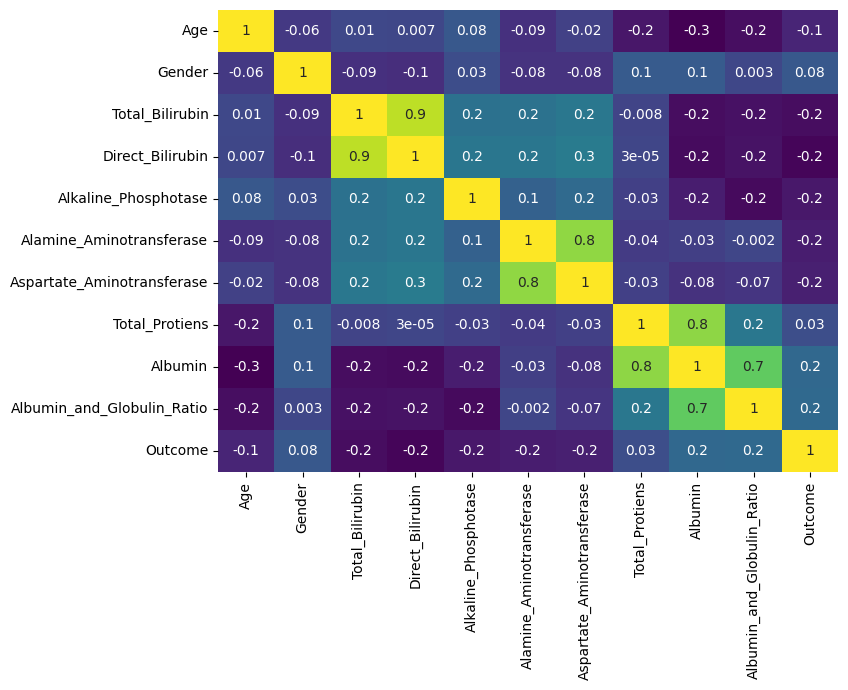

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap="viridis",cbar=False);

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

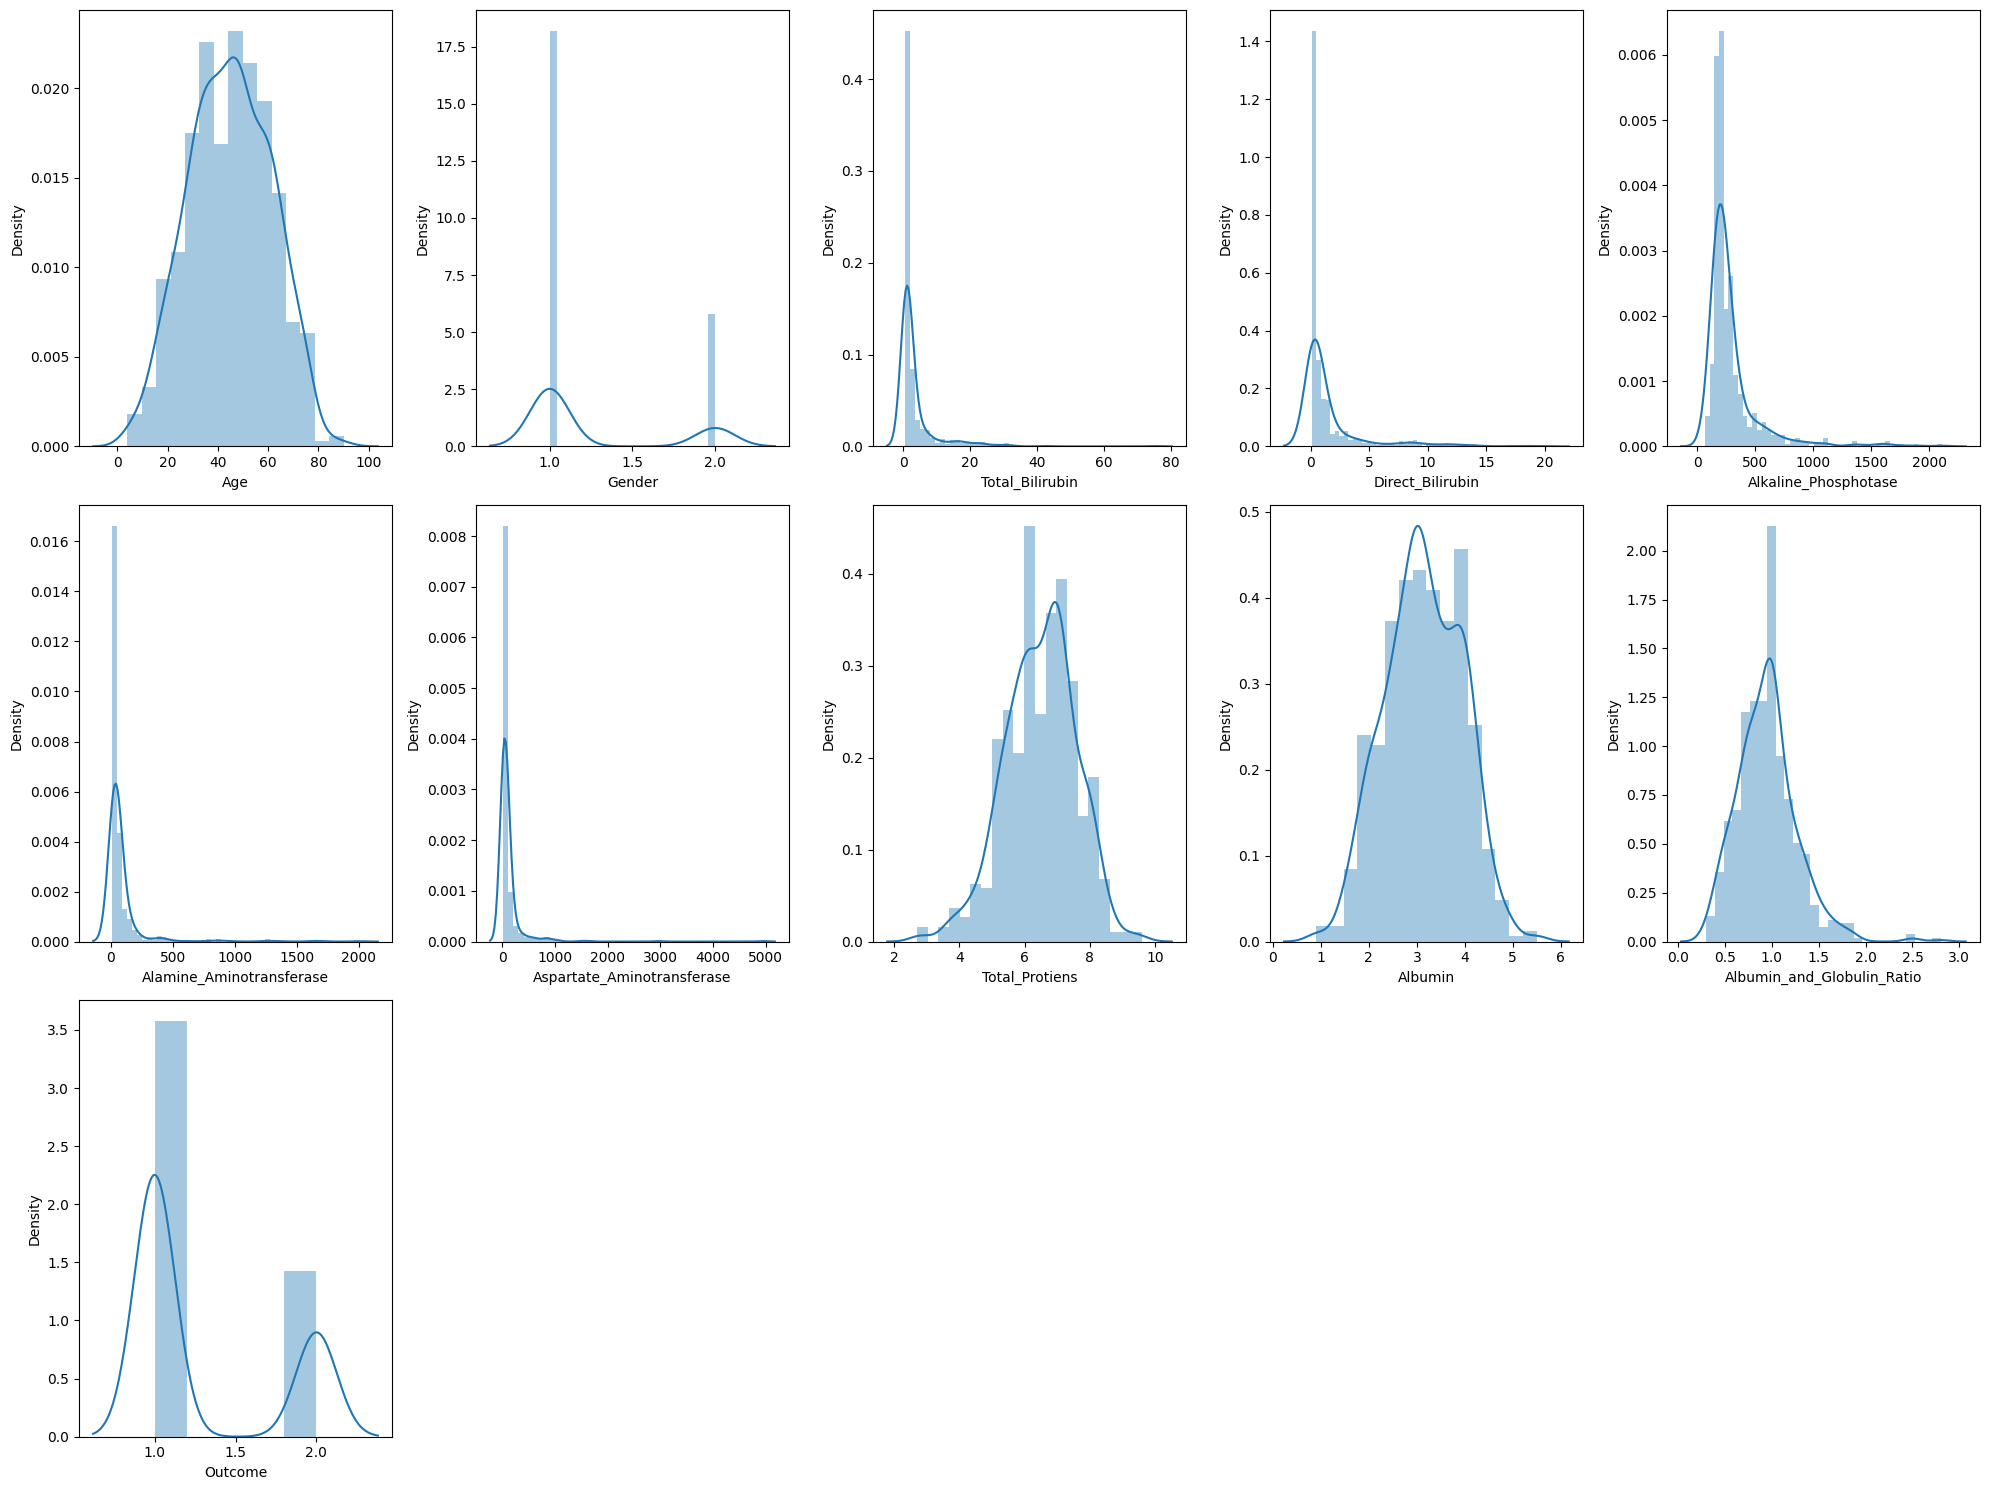

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

In [ ]:
X= df.drop("Outcome", axis=1)
Y = df["Outcome"]
print(X.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify =Y,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(579, 10) (463, 10) (116, 10)


Models

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
# accuracy on training data

model.fit(X_train, Y_train)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.734341252699784


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
LRtest_da = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', LRtest_da)

Accuracy on Test data :  0.7586206896551724


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(Y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(Y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

Training Accuracy of Random Forest Classifier is 0.9762419006479481
Test Accuracy of Random Forest Classifier is 0.6810344827586207 



DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 2, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, Y_train)

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(Y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits
Training Accuracy of Decision Tree Classifier is 0.7408207343412527
Test Accuracy of Decision Tree Classifier is 0.6724137931034483 



Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(Y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(Y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.6982758620689655 



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(Y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

Training Accuracy of Gradient Boosting Classifier is 0.9546436285097192
Test Accuracy of Gradient Boosting Classifier is 0.6896551724137931 



Stochastic Gradient Boosting (SGB)

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(Y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(Y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.7068965517241379 



XgBoost

In [ ]:
from xgboost import XGBClassifier
Y_train = [1 if label == 1 else 0 for label in Y_train]
Y_test = [1 if label == 1 else 0 for label in Y_test]


xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(Y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.7413793103448276 



Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(Y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(Y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.6724137931034483 



LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(Y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(Y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

[LightGBM] [Info] Number of positive: 331, number of negative: 132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 463, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714903 -> initscore=0.919316
[LightGBM] [Info] Start training from score 0.919316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

SVM

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
svm_datrn = accuracy_score(X_train_prediction, Y_train)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
svm_datest = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the training data : ', svm_datrn)
print('Accuracy score of the test data : ', svm_datest)

Accuracy score of the training data :  0.714902807775378
Accuracy score of the test data :  0.7155172413793104


In [ ]:
models = pd.DataFrame({
    'Model' : [  'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',  'Extra Trees Classifier','SVM'],
    'Score' : [  dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc,  etc_acc, svm_datest]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,SVM,0.715517
4,Stochastic Gradient Boosting,0.706897
2,Ada Boost Classifier,0.698276
3,Gradient Boosting Classifier,0.689655
1,Random Forest Classifier,0.681034
0,Decision Tree Classifier,0.672414
5,Extra Trees Classifier,0.672414


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

Ensemble


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()


In [ ]:
gbc.fit(X_train, Y_train)
abc.fit(X_train, Y_train)


AdaBoostClassifier()

In [ ]:
gbc_pred = gbc.predict(X_test)
abc_pred = abc.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
gbcda=accuracy_score(gbc_pred, Y_test)
abcda=accuracy_score(abc_pred, Y_test)
pred_final = (gbcda + abcda)/2.0
print(gbcda)
print(abcda)
print(pred_final)

0.6896551724137931
0.7155172413793104
0.7025862068965518


In [ ]:
print(gbc_pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 0]


In [ ]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(
    estimators=[('gbc', gbc), ('abc', abc)], voting='soft')
final_model.fit(X_train, Y_train)
pred_final = final_model.predict(X_test)
print(accuracy_score(pred_final,Y_test))

0.6982758620689655


In [ ]:
import pickle

In [ ]:
filename = 'liver_model.sav'
pickle.dump(ada, open(filename, 'wb'))

In [ ]:
#loading the saved model

loaded_model = pickle.load(open('liver_model.sav', 'rb'))

HEAT MAP

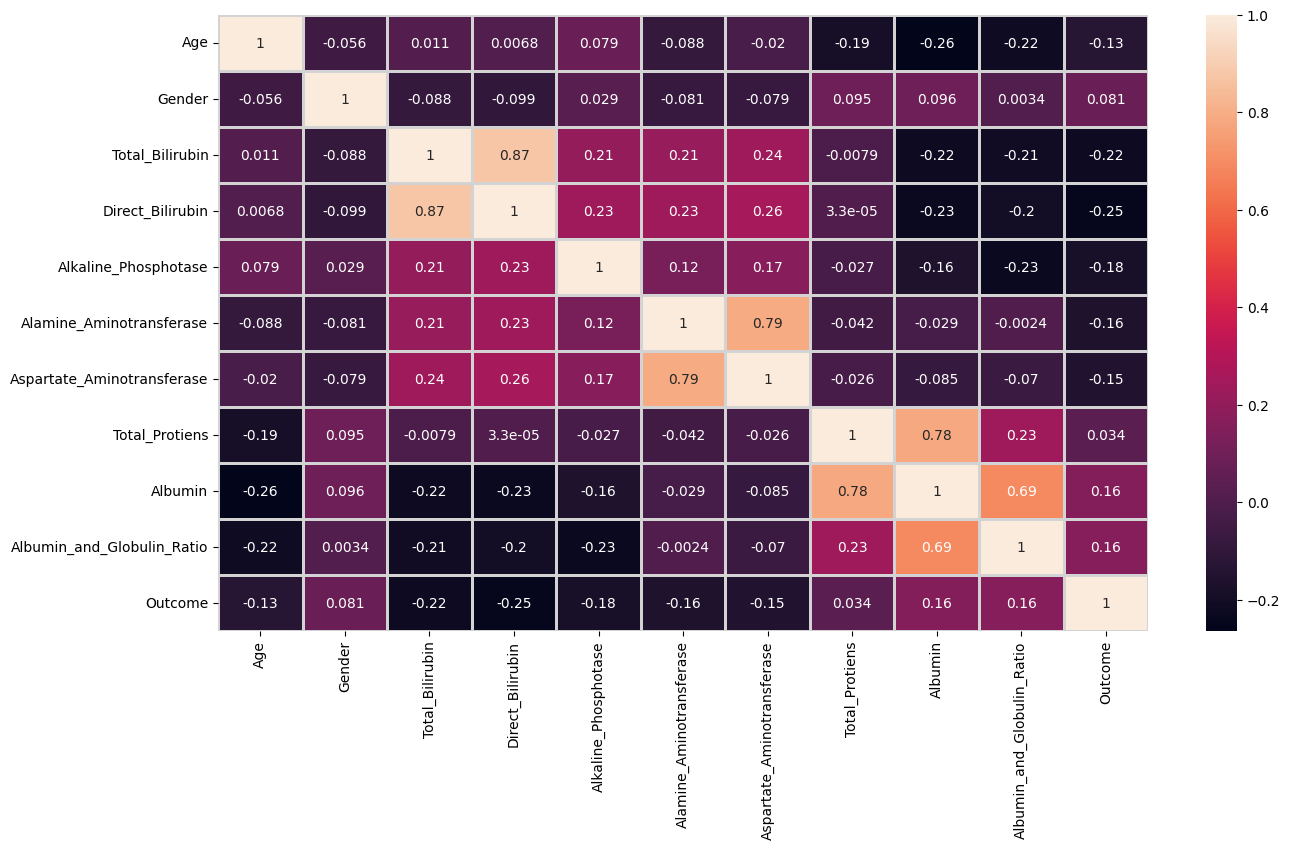

In [ ]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()